In [3]:
log_path = "data/monomer_chimeras.log"

#MONOMER_NAME: [(MonomerId, mutations)...]
monomers_list = {}
with open(log_path) as fr:
    for line in fr:
        if "MonomerId" in line:
            monomerName = line.split()[0]
            monomerId = line.split("MonomerId= ")[-1].split()[0]
            mutationList = line.split('[ ')[-1].split(' ]')[0].split(', ')
            if mutationList[0] == '':
                mutationList = []
            
            for i in range(len(mutationList)):
                mutationList[i] = mutationList[i].split('(')[0]
            
            if monomerName not in monomers_list:
                monomers_list[monomerName] = []
            
            monomers_list[monomerName].append((monomerId, mutationList))
            
print(monomers_list)

{'S3CXH1L.5': [('0', []), ('11', []), ('23', []), ('35', []), ('47', []), ('59', []), ('71', []), ('83', []), ('95', []), ('107', []), ('119', []), ('131', []), ('143', []), ('155', []), ('167', ['98', '124']), ('179', []), ('191', ['98', '124']), ('203', []), ('215', []), ('227', ['98', '124']), ('239', []), ('251', []), ('263', ['98', '124']), ('275', []), ('287', []), ('299', []), ('311', []), ('323', []), ('335', ['53', '153']), ('347', []), ('359', []), ('371', []), ('383', ['94']), ('395', []), ('407', []), ('419', []), ('431', []), ('443', ['94']), ('455', ['53', '153']), ('467', ['22', '25']), ('479', []), ('491', ['22', '25']), ('503', []), ('515', []), ('527', []), ('539', []), ('551', []), ('563', []), ('575', []), ('587', ['121']), ('599', []), ('611', ['121']), ('623', []), ('635', []), ('647', []), ('659', []), ('671', ['9']), ('683', []), ('695', []), ('707', ['9']), ('719', []), ('731', ['9']), ('743', ['129']), ('755', ['129']), ('767', ['129']), ('779', ['129']), ('79

In [97]:
def show_hist(dists_list):
    import matplotlib.pyplot as plt
    #dists_list = dists_list[:int(0.9*len(dists_list))]
    plt.hist(dists_list, bins=[i + 0.1 for i in range(15)])
    plt.show()

In [68]:
#Calculate dist between all same mutations; Only for closest one
def have_same_mutation(monomer1, monomer2):
    return len(set(monomer1[1]) & set(monomer2[1])) > 0

In [69]:
def show_all_nigber_dist(is_same):
    dists_list = []

    for monoName in monomers_list:
        monoList = monomers_list[monoName]
        for frM_id in range(len(monoList)):
            if len(monoList[frM_id][1]) == 0:
                continue
        
            for scM_id in range(frM_id + 1, len(monoList)):
                if is_same(monoList[frM_id], monoList[scM_id]):
                    dists_list.append(scM_id - frM_id)
                    break
    dists_list.sort()
    #print(dists_list)
    show_hist(dists_list)
    

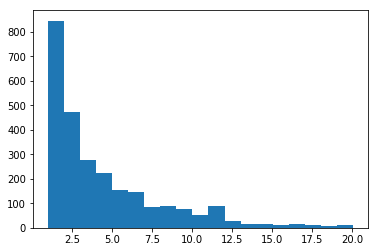

In [59]:
show_all_nigber_dist(have_same_mutation)

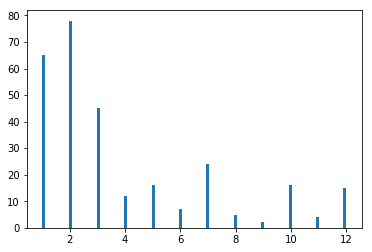

In [64]:
# Calculate hist only for run2 modification
dists_list = []

for monoName in monomers_list:
    monoList = monomers_list[monoName]
    MutationCnt = [0]*1000
    for frM_id in range(len(monoList)):
        for i in range(len(monoList[frM_id][1])):
            MutationCnt[int(monoList[frM_id][1][i])] += 1
    
    #print(MutationCnt)
    for frM_id in range(len(monoList)):
        doubleMut = []
        for i in range(len(monoList[frM_id][1])):
            if MutationCnt[int(monoList[frM_id][1][i])] == 2:
                doubleMut.append(monoList[frM_id][1][i])
        if len(doubleMut) == 0:
            continue
           
        for scM_id in range(frM_id + 1, len(monoList)):
            if have_same_mutation(("",doubleMut), monoList[scM_id]):
                dists_list.append(scM_id - frM_id)
                break
dists_list.sort()
show_hist(dists_list)

In [61]:
def equal_mutations(monomer1, monomer2):
    return (monomer1[1] == monomer2[1])

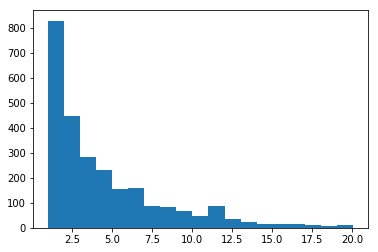

In [62]:
show_all_nigber_dist(equal_mutations)

1506
1505
1507
1507
1503
1509
1509
1513
1504
1499
1506
1508


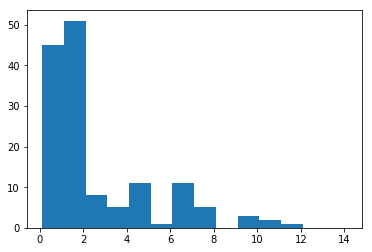

In [101]:
def mutations_hash(mutations):
    res = 0
    for i in range(len(mutations)):
        res = res * 179 + int(mutations[i])
    return res%1000000

# Calculate hist only for run2 monomers
dists_list = []

for monoName in monomers_list:
    monoList = monomers_list[monoName]
    MutationCnt = [0]*1000000
    for frM_id in range(len(monoList)):
        MutationCnt[mutations_hash(monoList[frM_id][1])] += 1
    
    #print(MutationCnt)
    print(len(monoList))
    for frM_id in range(3*len(monoList)//4, 4*len(monoList)//4):
        cur_hash = mutations_hash(monoList[frM_id][1])
        if MutationCnt[cur_hash] != 2:
            continue
        
        for scM_id in range(frM_id + 1, 4*len(monoList)//4):
            if mutations_hash(monoList[scM_id][1]) == cur_hash:
                if (scM_id - frM_id > 12):
                    print(monoName, frM_id, monoList[frM_id], scM_id, monoList[scM_id])
                dists_list.append(scM_id - frM_id)
                break


dists_list.sort()
#print(dists_list)
show_hist(dists_list)

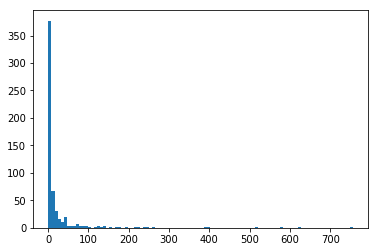

In [95]:
# Show dist between same HORS
def is_same(hor1_id, hor2_id):
    pos1_12 = -1;
    pos2_12 = -1;
    
    for monoName in monomers_list:
        monoList = monomers_list[monoName]
        cid1 = 0
        cid2 = 0
        if pos1_12 == -1:
            pos1_12 = int(monoList[hor1_id][0])//12
        else:
            for i in range(-20, 20):
                if (hor1_id + i < len(monoList)) and int(monoList[hor1_id + i][0])//12 == pos1_12:
                    cid1 = hor1_id + i
                    
        if pos2_12 == -1:
            pos2_12 = int(monoList[hor2_id][0])//12
        else:
            for i in range(-20, 20):
                if (hor2_id + i < len(monoList)) and int(monoList[hor2_id + i][0])//12 == pos2_12:
                    cid2 = hor2_id + i
        
        if cid1 == 0 or cid2 == 0:
            continue
            
        if (monoList[cid1][1] != monoList[cid2][1]):
            return False
    return True
        
    
dists_list = []
for hor1_id in range(1499):
    for hor2_id in range(hor1_id + 1, 1499):
        if is_same(hor1_id, hor2_id):
            dists_list.append(hor2_id - hor1_id)
            break
dists_list.sort()
#print(dists_list)
show_hist(dists_list)